<a href="https://colab.research.google.com/github/yustiks/statistics_in_python/blob/master/stochastic_variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

# Нормальное распределение

Параметр ```loc``` задаёт $\mu$, ```scale``` — среднеквадратичное отклонение $\sigma$, ```size``` — размер выборки. Имя параметра ```size``` при вызове функции ```rvs``` можно не писать.


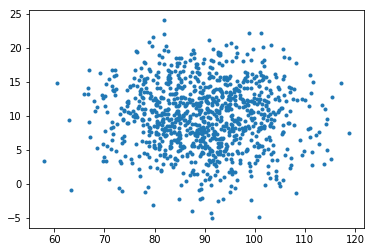

In [2]:
mu1 = 90
sigma1 = 10

mu2 = 10 
sigma2 = 5

amount = 1000

# зададим нормально распределенную случайную величину
norm_rv1 = sts.norm(loc=mu1, scale=sigma1)
norm_rv2 = sts.norm(loc=mu2, scale=sigma2)

# сгенерируем 1000 значений
x = norm_rv1.rvs(size=amount)
y = norm_rv2.rvs(size=amount)
plt.scatter(x, y, marker='.')
#print(y)

Сколько элементов в каждом значении (histogram)

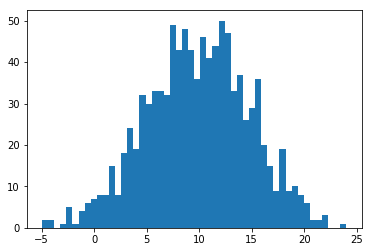

In [3]:
plt.hist(y,50)
plt.show()

2-ой способ генерации нормального распределения: модуль random. 

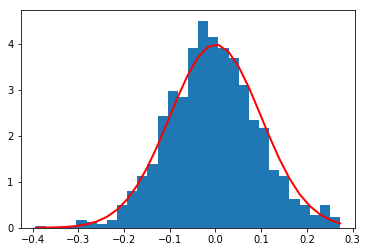

In [4]:
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)

count, bins, ignored = plt.hist(s, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ), # формула распределения Гаусса
         linewidth=2, color='r')
plt.show()

А так можно вычислить значение функции плотности вероятности нормального распределения в заданной точке:

In [6]:
norm_rv1.pdf(3)

1.4622963575006582e-18

Построим график функции плотности вероятности:

Text(0.5,0,'$x$')

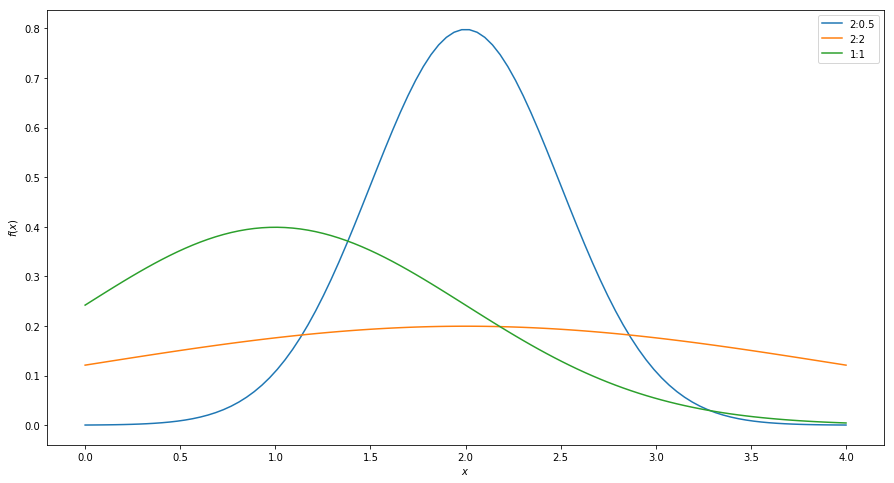

In [7]:
mu = 2.0
sigma = 0.5

# зададим нормально распределенную случайную величину
norm_rv = sts.norm(loc=mu, scale=sigma)
norm_rv2 = sts.norm(2, 0.1)
norm_rv3 = sts.norm(2, 2)
norm_rv4 = sts.norm(1, 1)
x = np.linspace(0,4,100)
pdf = norm_rv.pdf(x)
pdf2 = norm_rv2.pdf(x)
pdf3 = norm_rv3.pdf(x)
pdf4 = norm_rv4.pdf(x)
plt.figure(figsize=(15,8))
plt.plot(x, pdf)
# plt.plot(x, pdf2)
plt.plot(x, pdf3)
plt.plot(x, pdf4)

plt.legend(['2:0.5',  '2:2', '1:1'])
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

# Равномерное распределение на отрезке

Вот так можно сгенерировать выборку из случайной величины, имеющей равномерное распределение на отрезке $[a,b]$:

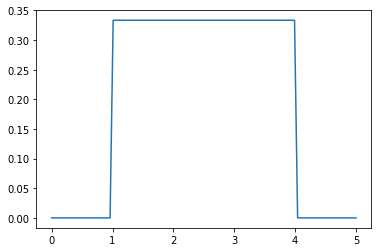

In [8]:
a = 1
b = 4

# обратите внимание, что в этой функции задается левая граница и масштаб, а не левая и правая границы:
uniform_rv = sts.uniform(a, b-a)

uniform_rv.rvs(10)

x = np.linspace(0, 5, 100)
pdf = uniform_rv.pdf(x)
plt.plot(x, pdf)

Количество измерений по отрезками:

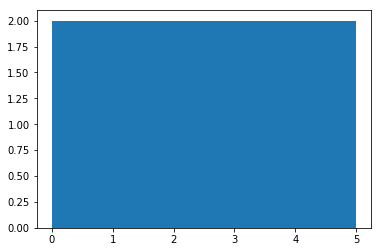

In [9]:
plt.hist(x,50)
plt.show()

# Выбросы в данных

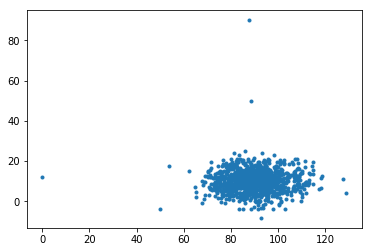

In [10]:
mu1 = 90
sigma1 = 10

mu2 = 10 
sigma2 = 5

amount = 1000

# зададим нормально распределенную случайную величину
norm_rv1 = sts.norm(loc=mu1, scale=sigma1)
norm_rv2 = sts.norm(loc=mu2, scale=sigma2)

# сгенерируем 1000 значений
x = norm_rv1.rvs(size=amount)
y = norm_rv2.rvs(size=amount)
x[7] = 0
x[9] = 50
y[0] = 90
y[2] = 50
plt.scatter(x, y, marker='.')
#print(y)

# Центральная предельная теорема

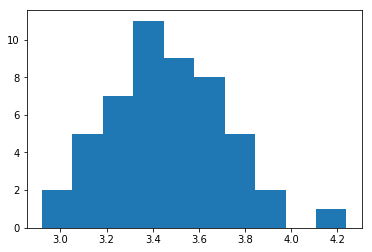

In [23]:
from numpy.random import randint

sampleMeans = []

for _ in range(50):
  # 50 элементов, значение которых от 1 до 7
    sampleMean = np.mean(randint(1, 7, 50))
    sampleMeans.append(sampleMean)

# если построим график - можно увидеть нормальное распределение
plt.hist(sampleMeans)
plt.show()

# Корелляция Пирсона

1.0


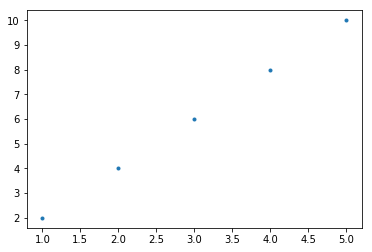

In [12]:
from scipy.stats import pearsonr
x = [1, 2, 3, 4, 5]

y = [2, 4, 6, 8, 10]
corr, p_value = pearsonr(x, y)
plt.scatter(x, y, marker='.')
print(corr)

# Пример корелляции

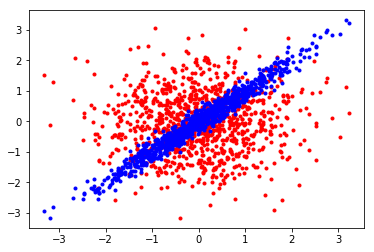

In [13]:
import numpy.linalg as la
n = 1000
C = [[1,0.98],[0.98,1]]
A = la.cholesky(C)
X = np.random.randn(n,2)
Y = np.dot(A,X.T)

plt.plot(X[:,0], X[:,1], 'r.')
plt.plot(Y[0,:], Y[1,:], 'b.')

# Пример корелляции данных, загруженных с помощью pandas

Загружаем данные о ценах на авокадо в США

In [14]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df=pd.read_csv(url)

Печатаем 5 значений

In [15]:
df[:5]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Размер выборки:

In [16]:
len(df)

18249

Нормализация значений

In [17]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

np_scaled = min_max_scaler.fit_transform(df[['Total Volume', 'Total Bags']])
df_norm = pd.DataFrame(np_scaled)
print(df_norm[:5])

          0         1
0  0.001026  0.000449
1  0.000877  0.000491
2  0.001890  0.000420
3  0.001262  0.000300
4  0.000815  0.000319


Корелляция скорее всего между Total Volume и Total Bags 

In [18]:
volume = df_norm[0]
bags = df_norm[1]

Посмотрим насколько они зависят друг от друга:

0.9630470824267297 0.0


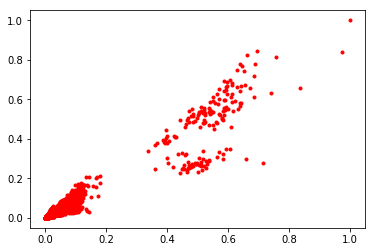

In [21]:
corr, p_value = pearsonr(volume, bags)
print(corr, p_value)
plt.plot(volume, bags, 'r.')

# Матрица ковариаций

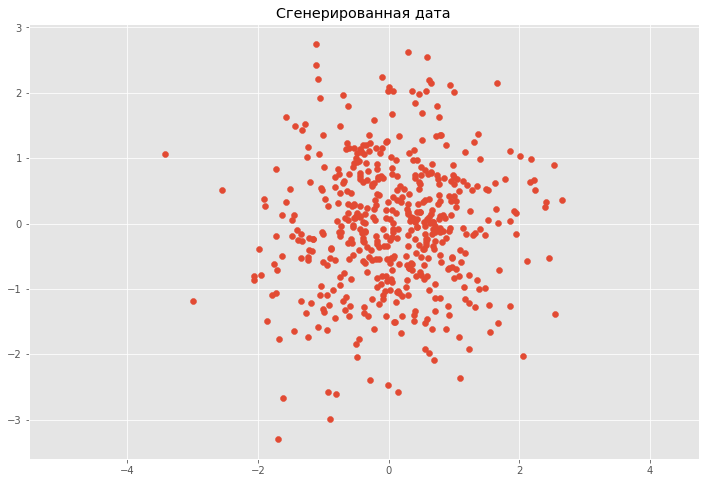

In [25]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)

#  Нормальное распределение x и y со средним значением 0 и разбросом 1
x = np.random.normal(0, 1, 500)
y = np.random.normal(0, 1, 500)
X = np.vstack((x, y)).T

plt.scatter(X[:, 0], X[:, 1])
plt.title('Сгенерированная дата')
plt.axis('equal');

Найдем матрицу ковариаций (диагональные элементы равны 1, элементы на обратной диагонали равны -1)

In [26]:
# посчитать ковариацию переменных (разброс относительно друг друга)
def cov(x, y):
    xbar, ybar = x.mean(), y.mean()
    return np.sum((x - xbar)*(y - ybar))/(len(x) - 1)

# матрица ковариаций
def cov_mat(X):
    return np.array([[cov(X[0], X[0]), cov(X[0], X[1])], \
                     [cov(X[1], X[0]), cov(X[1], X[1])]])

# считаем матрицу ковариаций для вектора X
cov_mat(X.T) # (or with np.cov(X.T))

array([[0.8738039 , 0.04907008],
       [0.04907008, 0.9735864 ]])

Изменим разброс распределений:

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


array([[ 0.42816391,  0.11678678],
       [ 0.11678678, 11.25465878]])

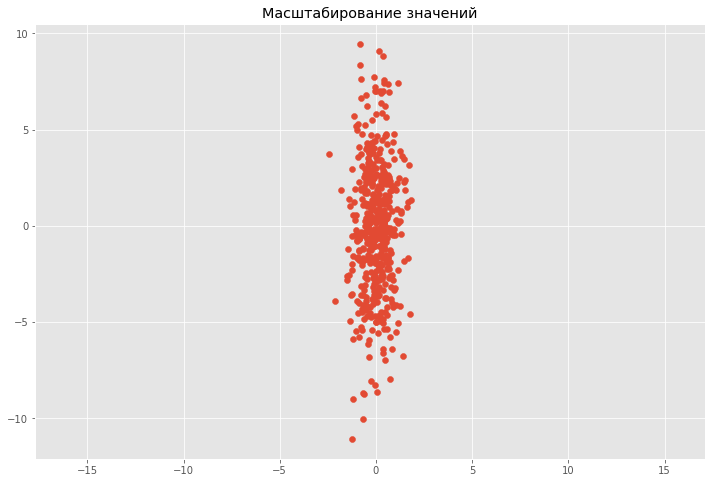

In [27]:
# центрирование переменных x, y
print(type(X))
X = X - np.mean(X, 0)

# Матрица масштабирования
sx, sy = 0.7, 3.4
Scale = np.array([[sx, 0], [0, sy]])

# Умножаем матрицу на исходную матрицу
Y = X.dot(Scale)
print(type(Y))

plt.scatter(Y[:, 0], Y[:, 1])
plt.title('Масштабирование значений')
plt.axis('equal')

# Calculate covariance matrix
cov_mat(Y.T)

Мы также можем изменить нормальное распределение с помощью повортов. 

array([[ 5.44856262, -5.45648367],
       [-5.45648367,  6.64603095]])

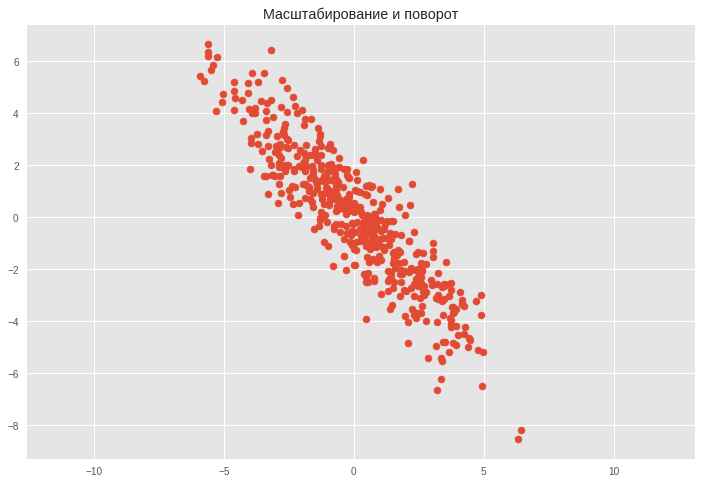

In [ ]:
# масштабирование
sx, sy = 0.7, 3.4
Scale = np.array([[sx, 0], [0, sy]])

# повороты
theta = 0.77*np.pi
c, s = np.cos(theta), np.sin(theta)
Rot = np.array([[c, -s], [s, c]])

# перемножаем 2 матрицы: масштабирование и повороты
T = Scale.dot(Rot)

# перемножаем матрицу X (рандомные величины) на матрицу поворотов
Y = X.dot(T)

plt.scatter(Y[:, 0], Y[:, 1])
plt.title('Масштабирование и поворот')
plt.axis('equal');

# вычисление матрицы ковариаций и вывод на экран
cov_mat(Y.T)

# Операции с матрицами. 

numpy.vstack - соединяем 2 массива вертикально;

numpy.ndarray.T - транспонирование матрицы 

In [ ]:
x = np.random.normal(0, 1, 3)
y = np.random.normal(0, 1, 3)
print('x')
print(x)
print('y')
print(y)
X = np.vstack((x, y)).T
print('numpy.vstack((x,y)).T')
print(X)

x
[ 0.41467568  0.28096341 -0.56372628]
y
[-0.1275888  -0.82959378  1.27921278]
numpy.vstack((x,y)).T
[[ 0.41467568 -0.1275888 ]
 [ 0.28096341 -0.82959378]
 [-0.56372628  1.27921278]]


Перемножение матриц: numpy.ndarray.dot(A) - перемножение на матрицу A

In [ ]:
x = np.random.normal(0, 1, 2)
y = np.random.normal(0, 1, 2)
X = np.vstack((x, y)).T
# Матрица масштабирования
sx, sy = 0.7, 3.4
Scale = np.array([[sx, 0], [0, sy]])
print('x: ', x)
print('y: ', y)
print('Исходные данные')
print(X)
print('Матрица масштабирования')
print(Scale)
# Умножаем исходные данные на матрицу масштабирования
Y = X.dot(Scale)
print('Результат')
print(Y)

x:  [0.00395401 0.77218354]
y:  [ 1.03493646 -1.32000986]
Исходные данные
[[ 0.00395401  1.03493646]
 [ 0.77218354 -1.32000986]]
Матрица масштабирования
[[0.7 0. ]
 [0.  3.4]]
Результат
[[ 2.76780900e-03  3.51878396e+00]
 [ 5.40528475e-01 -4.48803351e+00]]


Повороты матрицы.

In [ ]:
# повороты
theta = 0.77*np.pi
c, s = np.cos(theta), np.sin(theta)
Rot = np.array([[c, -s], [s, c]])

# перемножаем матрицу X (рандомные величины) на матрицу поворотов
Y = X.dot(Rot)

print(X)
print(Y)

[[ 0.00395401  1.03493646]
 [ 0.77218354 -1.32000986]]
[[ 0.68144981 -0.77893213]
 [-1.4521616   0.47949987]]


Полный список функций SciPy для работы со всеми распределениями можно найти тут: http://docs.scipy.org/doc/scipy-0.14.0/reference/stats.html